In [1]:
# 1. Data Aggregation
# Importing all the text files as pandas dataframe, with tab delimited values as columns.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob
import re
import os
import xgboost as xgb
from sklearn.metrics import classification_report
from xgboost import plot_tree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
files = glob.glob('C:\\Users\\AMIT\\Desktop\\MLTP\\*.txt')
print(files)
profile = pd.read_csv('E:\\Online Courses\\Python Course\\ABI\\profile.txt',header = None, sep = '\t')
files.sort()
target = profile[:][0]

fnames = []
names = []
for file in files:
    fnames.append(os.path.basename(file).strip('.txt'))
    names.append(os.path.basename(file).strip('.txt'))
fnames.sort()

['C:\\Users\\AMIT\\Desktop\\MLTP\\CE.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\CP.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\EPS1.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\FS1.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\FS2.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS1.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS2.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS3.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS4.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS5.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\PS6.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\SE.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\TS1.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\TS2.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\TS3.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\TS4.txt', 'C:\\Users\\AMIT\\Desktop\\MLTP\\VS1.txt']


In [3]:
data = {}
for i, file in enumerate(files):
    data[fnames[i]] = pd.read_csv(file,  header = None, sep = '\t')

PS1 :
    count        mean        std     min     25%     50%     75%     max
0  6000.0  160.673492  13.939309  145.83  151.19  156.25  166.31  191.51
1  6000.0  160.603320  14.118967  145.73  150.92  156.06  166.05  191.47
2  6000.0  160.347720  14.192619  145.37  150.59  155.72  165.87  191.41
3  6000.0  160.188088  14.227803  145.14  150.41  155.56  165.72  191.34
4  6000.0  160.000472  14.276434  144.95  150.19  155.34  165.49  191.41


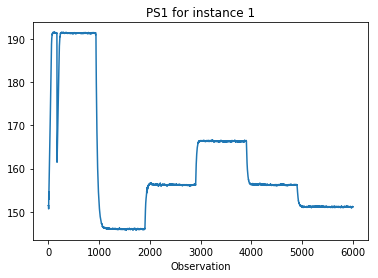


PS2 :
    count        mean        std  min       25%      50%     75%     max
0  6000.0  109.466914  47.114508  0.0  120.1900  129.365  130.54  156.99
1  6000.0  109.354890  47.045611  0.0  120.1300  129.385  130.38  157.56
2  6000.0  109.158845  46.992060  0.0  120.0400  129.325  130.13  156.97
3  6000.0  109.064807  46.972221  0.0  119.9600  128.865  130.02  156.44
4  6000.0  108.931434  46.874946  0.0  119.8375  129.000  129.82  158.13


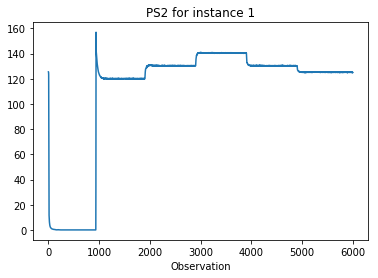


PS3 :
    count      mean       std  min    25%    50%    75%     max
0  6000.0  1.991475  0.945705  0.0  2.219  2.297  2.359  10.039
1  6000.0  1.976234  0.941967  0.0  2.195  2.273  2.352   9.992
2  6000.0  1.972224  0.943501  0.0  2.187  2.273  2.352  10.914
3  6000.0  1.946575  0.935534  0.0  2.141  2.242  2.305  10.297
4  6000.0  1.922707  0.930335  0.0  2.117  2.219  2.281  11.102


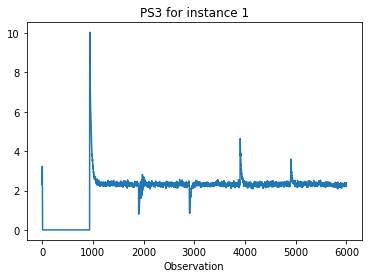


PS4 :
    count  mean  std  min  25%  50%  75%  max
0  6000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  6000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  6000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  6000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  6000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


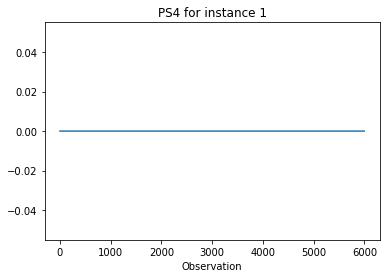


PS5 :
    count      mean       std    min    25%    50%      75%     max
0  6000.0  9.842170  0.088154  9.681  9.762  9.844  9.92200  10.016
1  6000.0  9.635142  0.038392  9.557  9.607  9.632  9.66300   9.745
2  6000.0  9.530548  0.035817  9.455  9.506  9.528  9.55700   9.640
3  6000.0  9.438827  0.037069  9.363  9.412  9.436  9.46725   9.535
4  6000.0  9.358762  0.029779  9.290  9.337  9.358  9.38000   9.443


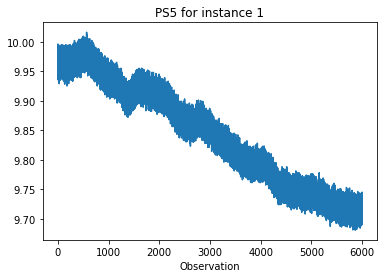


PS6 :
    count      mean       std    min    25%    50%    75%    max
0  6000.0  9.728097  0.085366  9.568  9.650  9.733  9.806  9.887
1  6000.0  9.529488  0.036316  9.454  9.503  9.526  9.556  9.637
2  6000.0  9.427949  0.036031  9.348  9.403  9.425  9.455  9.536
3  6000.0  9.337430  0.037375  9.257  9.311  9.335  9.366  9.431
4  6000.0  9.260636  0.028592  9.195  9.238  9.260  9.281  9.342


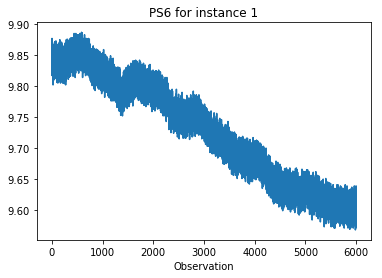


TS1 :
   count       mean       std     min       25%      50%       75%     max
0   60.0  35.621983  0.308230  35.156  35.40100  35.5720  35.89975  36.152
1   60.0  36.676967  0.585740  35.648  36.09000  36.7675  37.18750  37.488
2   60.0  37.880800  0.559169  36.879  37.37825  38.0235  38.37900  38.621
3   60.0  38.879050  0.516176  37.887  38.44425  39.0550  39.36000  39.473
4   60.0  39.803917  0.535374  38.789  39.35150  39.9670  40.30900  40.391


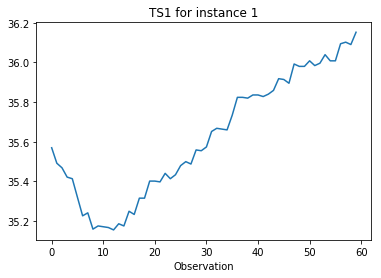


TS2 :
   count       mean       std     min     25%      50%       75%     max
0   60.0  40.978767  0.154302  40.773  40.812  40.9630  41.12600  41.250
1   60.0  41.532767  0.338234  41.031  41.223  41.5180  41.86800  42.105
2   60.0  42.442450  0.390588  41.832  42.111  42.4235  42.85575  43.039
3   60.0  43.403983  0.398476  42.805  43.036  43.3650  43.83100  43.988
4   60.0  44.332750  0.372769  43.742  44.009  44.3355  44.66575  44.887


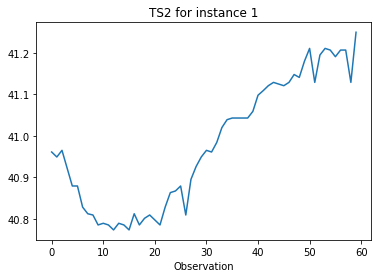


TS3 :
   count       mean       std     min      25%      50%       75%     max
0   60.0  38.471017  0.084659  38.316  38.4160  38.4960  38.52075  38.613
1   60.0  38.978967  0.176921  38.668  38.8410  38.9845  39.10350  39.254
2   60.0  39.631950  0.251133  39.234  39.4080  39.6270  39.79200  40.062
3   60.0  40.403383  0.285434  40.023  40.1485  40.3420  40.60050  40.934
4   60.0  41.310550  0.293579  40.859  41.0030  41.3400  41.51100  41.777


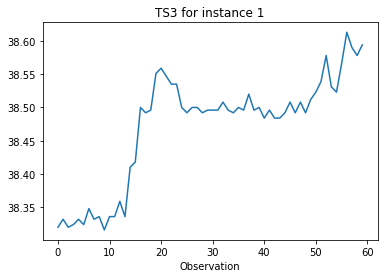


TS4 :
   count       mean       std     min       25%     50%       75%     max
0   60.0  31.745250  1.116478  30.363  30.66500  31.576  32.77850  33.594
1   60.0  34.493867  0.435312  33.648  34.14725  34.553  34.88975  35.148
2   60.0  35.646150  0.293889  35.098  35.40025  35.635  35.88000  36.141
3   60.0  36.579467  0.262397  36.105  36.37900  36.635  36.80200  36.988
4   60.0  37.427900  0.239571  36.992  37.24125  37.439  37.60900  37.781


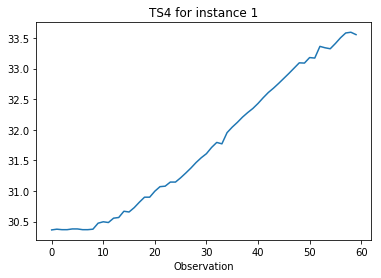


VS1 :
   count      mean       std    min      25%     50%      75%    max
0   60.0  0.576950  0.027078  0.532  0.55300  0.5770  0.60300  0.624
1   60.0  0.565850  0.027241  0.524  0.54700  0.5595  0.57850  0.626
2   60.0  0.576533  0.036729  0.529  0.54925  0.5620  0.59525  0.662
3   60.0  0.569267  0.033464  0.527  0.54775  0.5550  0.59200  0.645
4   60.0  0.577367  0.033484  0.524  0.54850  0.5760  0.59275  0.660


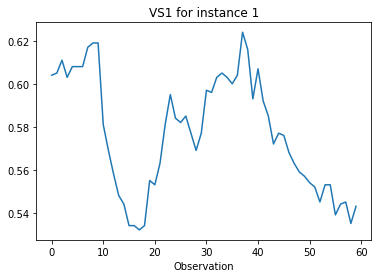


FS1 :
   count      mean       std  min      25%    50%      75%     max
0  600.0  6.709815  3.015428  0.0  7.68775  7.836  7.93400  18.710
1  600.0  6.715315  3.006248  0.0  7.72400  7.853  7.95225  18.712
2  600.0  6.718522  3.014248  0.0  7.69875  7.847  7.95425  18.698
3  600.0  6.720565  3.020176  0.0  7.71100  7.843  7.95425  18.896
4  600.0  6.690308  3.011550  0.0  7.69025  7.831  7.94325  18.876


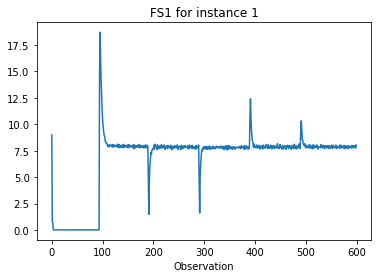


FS2 :
   count       mean       std     min       25%     50%       75%     max
0  600.0  10.304592  0.091772  10.148  10.21050  10.327  10.38900  10.446
1  600.0  10.403098  0.019162  10.352  10.38900  10.403  10.41600  10.453
2  600.0  10.366250  0.026361  10.296  10.34775  10.367  10.38600  10.443
3  600.0  10.302678  0.026750  10.241  10.28300  10.302  10.32025  10.382
4  600.0  10.237750  0.029170  10.179  10.21400  10.236  10.25800  10.312


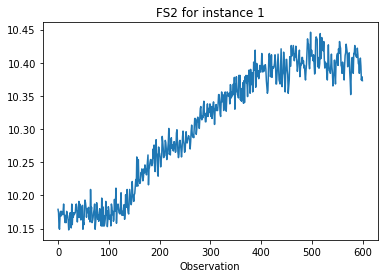


EPS1 :
    count         mean         std     min     25%     50%     75%     max
0  6000.0  2538.929167  185.616121  2339.8  2409.8  2479.8  2618.8  2951.6
1  6000.0  2531.498900  189.940089  2332.0  2397.8  2470.0  2607.8  2947.4
2  6000.0  2519.928000  190.736850  2318.6  2385.8  2457.4  2597.6  2939.8
3  6000.0  2511.541633  191.270607  2310.8  2377.8  2448.0  2587.8  2929.6
4  6000.0  2503.449500  191.258369  2301.8  2370.8  2440.6  2579.6  2923.8


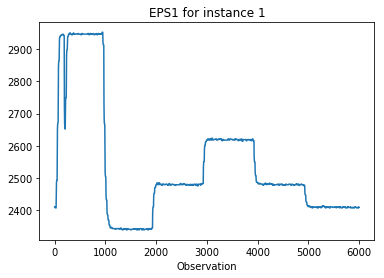

In [4]:
files_1 = ["PS1", "PS2", "PS3", "PS4", "PS5", "PS6", "TS1", "TS2", "TS3","TS4", "VS1", "FS1", "FS2", "EPS1"]

for file in files_1:
    data_1 = pd.read_table(('C:\\Users\\AMIT\\Desktop\\MLTP\\' + file +'.txt'), 
                  delim_whitespace= True, header = None)
    print(file,':')
    print(data_1.apply(pd.DataFrame.describe, axis=1).head())
    row1 = data_1.iloc[0]
    plt.figure()
    plt.plot(row1)
    plt.xlabel("Observation")
    plt.title((file +  " for instance 1"))
    plt.show()
    print("")

In [5]:
pressure_files = ['PS1','PS2','PS3','PS4','PS5','PS6','EPS1']
flow_files = ['FS1','FS2']

In [6]:
pressure_names = []
flow_names = []
for name in pressure_files:
    pressure_names.append(name+'_100')
    
for name in flow_files:
    flow_names.append(name+'_100')
    
    

In [7]:
PS1_100 = {}
PS2_100 = {}
PS3_100 = {}
PS4_100 = {}
PS5_100 = {}
PS6_100 = {}
EPS1_100 = {}
FS1_100 = {}
FS2_100 = {}

In [8]:
pressure_list = [PS1_100,PS2_100,PS3_100,PS4_100,PS5_100,PS6_100,EPS1_100]
flow_list = [FS1_100,FS2_100]

In [9]:
dict_list = []
def slicer(file_name,dict_name):
    count = 0
    if file_name in pressure_files:
        for i in range(0,6000,100):
            count+= 1
            start = i
            end = start + 100
            dict_name[count] = data[file_name].iloc[:,start:end].mean(axis = 1)
    elif file_name in flow_files:
        for i in range(0,600,10):
            count+= 1
            start = i
            end = start + 10
            dict_name[count] = data[file_name].iloc[:,start:end].mean(axis = 1)

In [10]:
for file,dic in zip(pressure_files,pressure_list):
    slicer(file,dic)

In [11]:
for file,dic in zip(flow_files,flow_list):
    slicer(file,dic)

In [12]:
df_list = []
for name in pressure_list:
    df_list.append(pd.DataFrame(name))

for name in flow_list:
    df_list.append(pd.DataFrame(name))

for name in ['TS1','TS2','TS3','TS4','VS1','CE','CP','SE']:
    df_list.append(data[name])

In [13]:
frame = pd.concat(df_list, axis = 1)

In [14]:
frame = frame.T.reset_index(drop = True).T

In [15]:
col_list = ['PS1','PS2','PS3','PS4','PS5','PS6','EPS1','FS1','FS2','TS1','TS2','TS3','TS4','VS1','CE','CP','SE']

In [16]:
col_name = []
for col in col_list:
    for i in range(1,61):
        col_name.append(col+'_'+str(i))       

In [17]:
col_dict = {}
for name,i in zip(col_name,list(frame.columns)):
    col_dict[i] = name

In [18]:
frame = frame.rename(columns = col_dict)

In [19]:
print('Shape of Final Dataset :-', frame.shape)
frame.head()

Shape of Final Dataset :- (2205, 1020)


,PS1_1,PS1_2,PS1_3,PS1_4,PS1_5,PS1_6,PS1_7,PS1_8,PS1_9,PS1_10,...,SE_51,SE_52,SE_53,SE_54,SE_55,SE_56,SE_57,SE_58,SE_59,SE_60
0,176.8996,184.6420,189.8996,191.3442,191.2833,191.3120,191.2947,191.3183,191.3116,174.3218,...,74.427,68.101,68.101,68.420,68.420,68.223,68.223,68.159,68.159,68.264
1,174.2707,191.3529,191.3024,191.3244,191.2904,191.2400,191.2647,191.2463,191.2714,174.2776,...,74.492,68.536,68.536,68.465,68.465,68.491,68.491,68.528,68.528,68.595
2,174.0188,191.2384,191.2183,191.2233,191.2159,191.2040,191.1968,191.1760,191.2123,174.0287,...,74.986,68.901,68.901,68.805,68.805,68.456,68.456,68.758,68.758,68.628
3,173.6540,191.1975,191.1919,191.1685,191.1353,191.1725,191.1252,191.1575,191.0729,173.9173,...,75.154,68.860,68.860,68.946,68.946,69.021,69.021,68.851,68.851,68.868
4,173.4353,191.2045,191.1586,191.0698,191.1039,191.0707,191.0806,191.0756,191.0682,173.8489,...,75.304,68.483,68.483,68.819,68.819,68.862,68.862,69.036,69.036,68.972


In [20]:
# Trying Feature Selection
full_data = pd.concat([target,frame],axis = 1)
feature_list = []
def Feature_Selector(k, dataset,num_estimator):
    arr = dataset.values
    X = arr[:,1:23]
    Y = arr[:,0]
    model = ExtraTreesClassifier(n_estimators= num_estimator)
    rfe = RFE(model, k)
    data = rfe.fit(X,Y)
    print("Num Features: %s" % (data.n_features_))
    for count,i in enumerate(data.ranking_):
        if i == 1:
            feature_list.append(full_data.columns[count+1])
    
    
    print(feature_list)
    

In [21]:
Feature_Selector(5,full_data,10)

# Feature Selection does not work in our case, as for each variable, there are 60 attributes, taken over 60 seconds. 
# the total features become 1020. As there is high correlation between each of the 60 attributes for one variable, the Feature 
# selection considers many attributes from a single variable like shown below. So to cover all variables and their variance, 
# features selected will be in hundreds which is neither feasible nor logical. Hence, to explain the variance, we opted with PCA.

Num Features: 5
['PS1_3', 'PS1_9', 'PS1_15', 'PS1_17', 'PS1_19']


In [22]:
# b:- Separating the the estimators and the target condition. 

# X containes all the attributes(variables) which are the estimators for the target condition
# Y contains the target condition.

X = frame
Y = target

print('Estimator Variables :',X.shape)
print('Target Condition : ', Y.shape)

Estimator Variables : (2205, 1020)
Target Condition :  (2205,)


In [23]:
#c: Standardising the data.

X = StandardScaler().fit_transform(X)
print(X)

[[ 1.34749573 -8.98060701 -1.21813378 ...  0.2308984   0.2308984
   0.25677843]
 [ 0.5135785   1.04405824  1.06604276 ...  0.3105272   0.3105272
   0.32805242]
 [ 0.43367293  0.87301945  0.9291029  ...  0.36016032  0.36016032
   0.33515829]
 ...
 [ 1.52050286  1.21315509  1.33438629 ...  0.26779955  0.26779955
   0.21780384]
 [ 1.50879776  1.26379452  1.39626161 ...  0.28527904  0.28527904
   0.21651186]
 [ 1.52852831  1.24900602  1.33894552 ...  0.25226222  0.25226222
   0.22512503]]


In [24]:
#Splitting Data into Train and Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, 
                                                     random_state = 0)

print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("Y_train Shape :", Y_train.shape)
print("Y_test Shape :", Y_test.shape)

X_train Shape : (1543, 1020)
X_test Shape : (662, 1020)
Y_train Shape : (1543,)
Y_test Shape : (662,)


[70.41053684 16.04297442  3.97644151  2.79783114  1.49011369  0.93469365
  0.7240627   0.62408166  0.32603444  0.27642527]


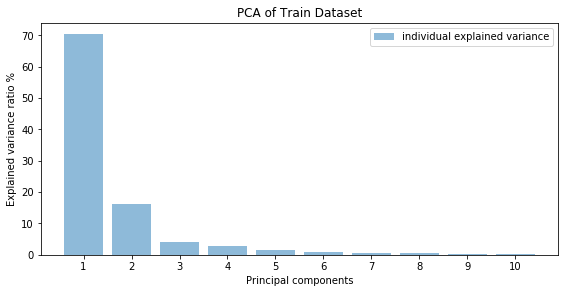

In [25]:
pca = PCA(n_components = 10)
pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100 )
plt.figure(figsize=(8,4))
components = list(range(1,11))

plt.bar(components, explained_variance*100, alpha=0.5, align='center',tick_label = [1,2,3,4,5,6,7,8,9,10],
        label='individual explained variance')
plt.ylabel('Explained variance ratio %')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('PCA of Train Dataset')
plt.show()

Explained Variance Ratio :-  [70.61797399 15.97577321]


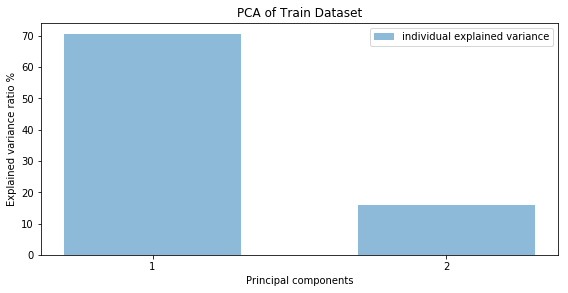

In [26]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio :- ',explained_variance*100 )
plt.figure(figsize=(8,4))

plt.bar(range(2), explained_variance*100, alpha=0.5, align='center', tick_label =  [1,2], width=0.6,
        label='individual explained variance')
plt.ylabel('Explained variance ratio %')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('PCA of Train Dataset')
plt.show()

[70.41053684 16.04297442  3.97644151  2.79783114  1.49011369  0.93469365
  0.7240627   0.62408166  0.32603444  0.27642527]


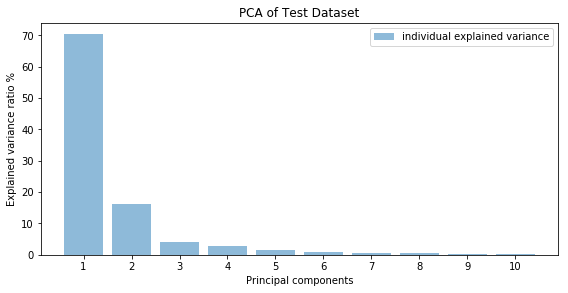

In [27]:
pca = PCA(n_components = 10)
pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100 )
plt.figure(figsize=(8,4))
components = list(range(1,11))

plt.bar(components, explained_variance*100, alpha=0.5, align='center',tick_label = [1,2,3,4,5,6,7,8,9,10],
        label='individual explained variance')
plt.ylabel('Explained variance ratio %')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('PCA of Test Dataset')
plt.show()


Explained Variance Ratio :-  [69.96155639 16.19928315]


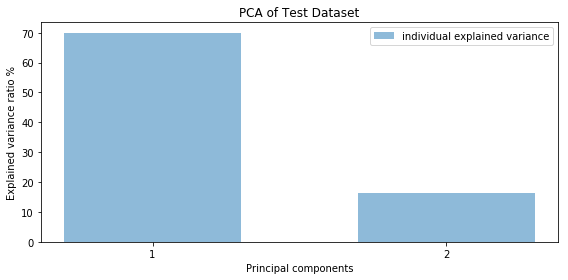

In [28]:
pca = PCA(n_components = 2)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio :- ',explained_variance*100 )
plt.figure(figsize=(8,4))

plt.bar(range(2), explained_variance*100, alpha=0.5, align='center', tick_label =  [1,2], width=0.6,
        label='individual explained variance')
plt.ylabel('Explained variance ratio %')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA of Test Dataset')
plt.tight_layout()
plt.show()

In [29]:
# Classifier Algorithms to train the dataset and build models
# 1. Logistic Regression:

# Import the model we are using

# Instantiate the model.
classifier = LogisticRegression()

# Train the model on training data
classifier.fit(X_train,Y_train)

#Predicition using the Test Data 
y_pred = classifier.predict(X_test)

In [30]:
# Calculating the accuracy of the model.
accuracyLR = accuracy_score(Y_test, y_pred, normalize=True, sample_weight=None)
print('The accuracy of the Logistic Regression model is : ' , accuracyLR*100, '%')

# Creating Confusion matrix to compare the prediction with actual class of the data.
cm = confusion_matrix(y_true = Y_test, y_pred=y_pred)
print('Confusion Matirx for Logistic Regression :-',cm)

print(classification_report(Y_test, y_pred))

The accuracy of the Logistic Regression model is :  97.73413897280967 %
Confusion Matirx for Logistic Regression :- [[219  11   1]
 [  2 215   0]
 [  0   1 213]]
             precision    recall  f1-score   support

          3       0.99      0.95      0.97       231
         20       0.95      0.99      0.97       217
        100       1.00      1.00      1.00       214

avg / total       0.98      0.98      0.98       662



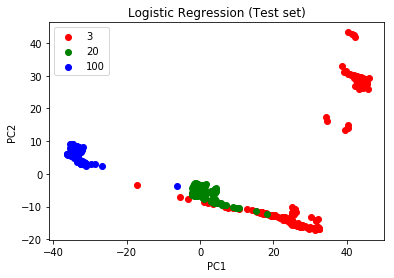

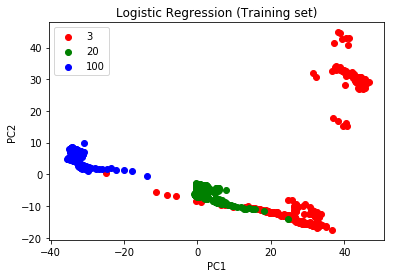

In [31]:
# Visualizing the Test Dataset with predicted cooler conditon class and Principal components. 

for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualizing the Training/ Actual dataset with the cooler condtion and Principal Components.
for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [32]:
# 2. Random Forest Classifier

# Instantiate model with 100 decision trees
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Train the model on training data
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
y_pred.shape

(662,)

In [33]:
# Calculating the accuracy of the model.
accuracyRF = accuracy_score(Y_test, y_pred.round(), normalize=True, sample_weight=None)
print('The accuracy of the Random Forest model is : ' , accuracyRF*100, '%')

# Creating Confusion matrix to compare the prediction with actual class of the data.
cm = confusion_matrix(y_true = Y_test, y_pred=y_pred.round())
print('Confusion Matirx for Random Forest :-',cm)

print(classification_report(Y_test, y_pred))

The accuracy of the Random Forest model is :  98.03625377643505 %
Confusion Matirx for Random Forest :- [[222   9   0]
 [  3 214   0]
 [  1   0 213]]
             precision    recall  f1-score   support

          3       0.98      0.96      0.97       231
         20       0.96      0.99      0.97       217
        100       1.00      1.00      1.00       214

avg / total       0.98      0.98      0.98       662



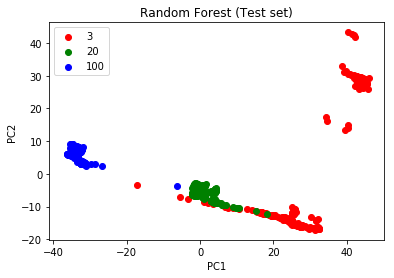

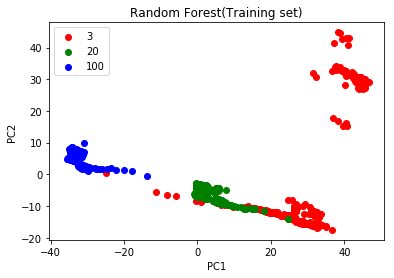

In [34]:
# Visualizing the Test Dataset with predicted cooler conditon class and Principal components. 

for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


# Visualizing the Training/ Actual dataset with the cooler condtion and Principal Components.

for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Random Forest(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


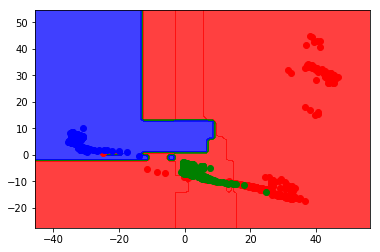

In [35]:
X_set,Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10, step = 1),
        np.arange(start = X_set[:,1].min() - 10, stop = X_set[:,1].max()+10, step = 1))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j,1],c = ListedColormap(('red','green','blue'))(i),label = j)

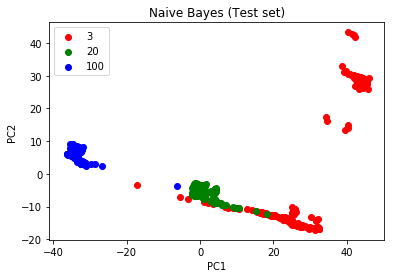

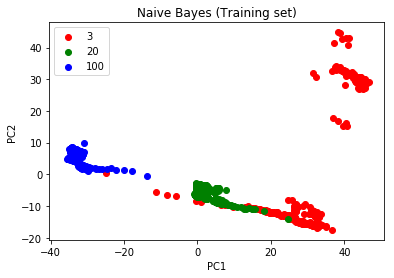

In [36]:
# Visualizing the Test Dataset with predicted cooler conditon class and Principal components. 

for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualizing the Training/ Actual dataset with the cooler condtion and Principal Components.

for i, j in enumerate(np.unique(y_pred)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [37]:
xgb1 = xgb.sklearn.XGBClassifier()
xgb1.fit(X_train, Y_train)

#test
y_pred_test= xgb1.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_test)
print(classification_report(Y_test, y_pred_test))
print('the confusion matrix is \n',cm)
accuracy_XG = accuracy_score(Y_test, y_pred_test)
print(accuracy_XG)

             precision    recall  f1-score   support

          3       0.99      0.94      0.96       231
         20       0.94      1.00      0.97       217
        100       1.00      1.00      1.00       214

avg / total       0.98      0.98      0.98       662

the confusion matrix is 
 [[217  13   1]
 [  1 216   0]
 [  1   0 213]]
0.9758308157099698


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
## SVM
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train)  
y_pred = svclassifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
print('the confusion matrix is \n',cm)

accuracy_SVM = accuracy_score(Y_test, y_pred)
print(accuracy_SVM*100)

             precision    recall  f1-score   support

          3       0.99      0.95      0.97       231
         20       0.95      0.99      0.97       217
        100       1.00      1.00      1.00       214

avg / total       0.98      0.98      0.98       662

the confusion matrix is 
 [[219  11   1]
 [  2 215   0]
 [  0   1 213]]
97.73413897280967


In [39]:
## Linear Discriminant Analysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy_LDA = accuracy_score(Y_test, y_pred)
print(accuracy_LDA*100)

97.58308157099698


Logistic Regression Accuracy :-  97.73413897280967 %
Random Forest Classification Accuracy :-  98.03625377643505 %
XGBoost Accuracy :- 97.58308157099698 %
SVM Accuracy :- 97.73413897280967 %
LDA Accuracy :- 97.58308157099698 %


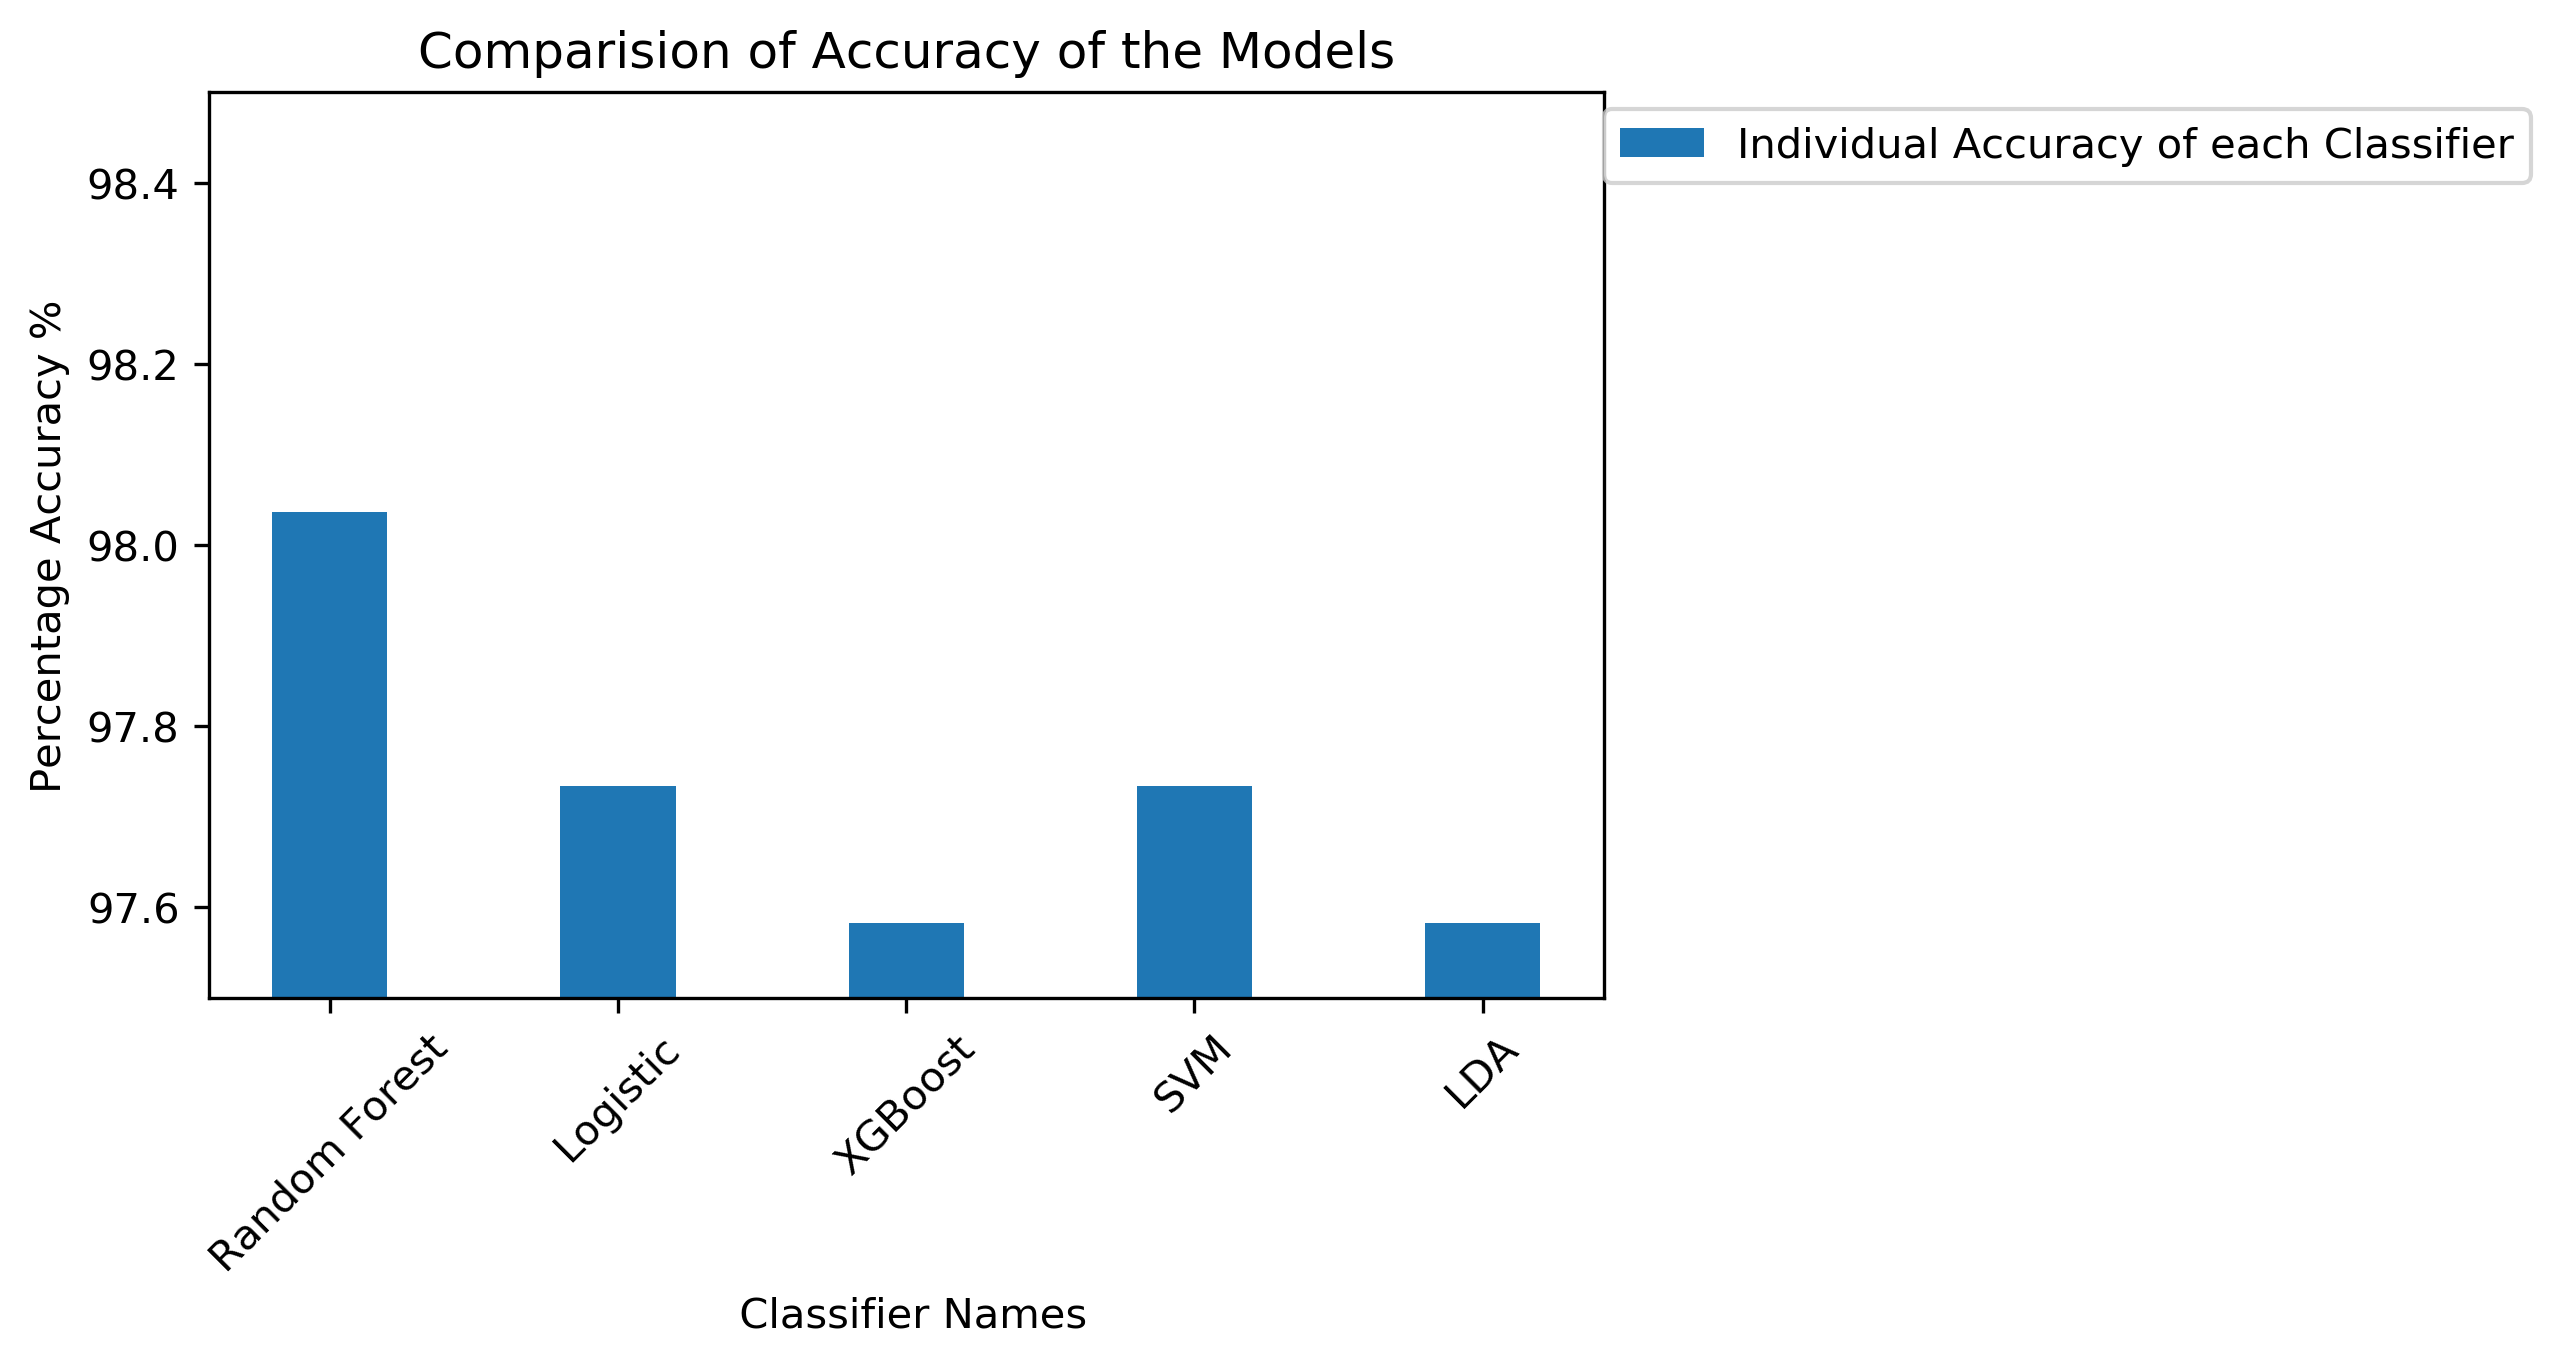

In [40]:
# Comparing the Three Models"

print('Logistic Regression Accuracy :- ', accuracyLR*100,'%')
print('Random Forest Classification Accuracy :- ', accuracyRF*100,'%' )
print('XGBoost Accuracy :-',  accuracy_XG*100,'%')
print('SVM Accuracy :-',  accuracy_SVM*100,'%')
print('LDA Accuracy :-',  accuracy_LDA*100,'%')

# Bar graph of the accuracies of the mdoels.
plt.figure(dpi = 300)
plt.bar(list(range(5)), [accuracyRF*100, accuracyLR*100,accuracy_XG*100, accuracy_SVM*100,accuracy_LDA*100], 
        width = 0.4 ,tick_label = ['Random Forest', 'Logistic', 'XGBoost','SVM','LDA'],
        label = 'Individual Accuracy of each Classifier')
plt.legend(loc = (1,0.9))
plt.ylim(97.5,98.5)
plt.title('Comparision of Accuracy of the Models')
plt.xlabel(' Classifier Names')
plt.ylabel('Percentage Accuracy %')
plt.xticks(rotation = 45)

plt.show()
